In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [3]:
from sklearn.tree import export_graphviz

# visualize the tree
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

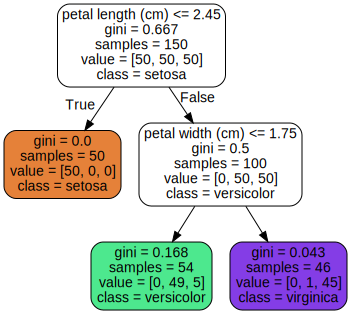

In [5]:
from graphviz import Source

Source.from_file("iris_tree.dot")

Decision trees require very little data prep.

They don't require feature scaling or centering at all.

Scikit-learn uses CART ("Classification and Regression Tree") algo which means it produces binary trees only.

Other algos like ID3 can produce more general trees.

In [6]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For lea

DTs are white box models.

Random Forests and ANNs are considered black box models.

=> Interpretable ML

In [7]:
# calculates proba by traversing tree and then finding ratio of instances of class k
print(tree_clf.predict_proba([[5,1.5]]).round(3))
print(tree_clf.predict([[5,1.5]]))

[[0.    0.907 0.093]]
[1]


## CART Algo
Split training set into 2 subsets using a feature "k" and a threshold t_k.
<br> e.g. "petal length <= 2.45cm"
<br>k and t_k are chosen such that (k, t_k) pair gives purest subset, weighted by their size
<br>This is done recursively

CART is a greedy algo, so it doesn't check if split at top leads to lowest impurity several levels down.
<br>Finding optimal tree is NP-complete, requiring O(e^m) time
<br>CART's prediction complexity is O(lg(m)), where lg is log base 2
<br>Its training complexity is O(n * mlg(m))

## Gini vs Entropy
Gini tends to isolate most frequent class into its own branch and is faster to calculate
<br>Whereas Entropy leads to more balanced trees

## Regularization

In [8]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_iris, y_moons)
tree_clf2.fit(X_iris, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [9]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)

print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.52
0.157


## Regression

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad**2 + 0.025 + np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [11]:
export_graphviz(tree_reg, "quad_tree.dot", rounded=True, filled=True)

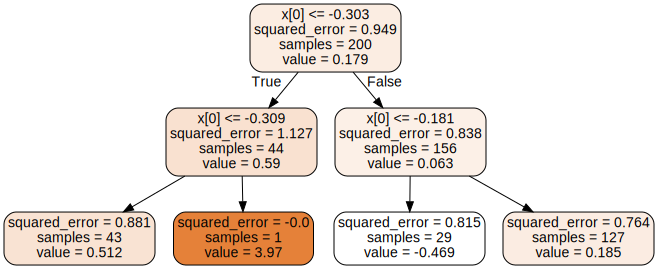

In [12]:
Source.from_file("quad_tree.dot")

For regression, CART minimizes MSE rather than impurity

DT is sensitive to orientation of data.
<br>The same data that can be vertically divided will be more difficult for DT if it's rotated e.g. 45 degrees.
<br>The model needs to partition it into regions to "cut" it at 45 degree

One technique to help with this is PCA, which reduces correlation b/w the features and this almost always helps the DT

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipe = make_pipeline(StandardScaler(), PCA())
X_iris_rot = pca_pipe.fit_transform(X_iris)

tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rot, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

A major issue with DT is that they have high variance.
<br>This can be rectified by averaging over many DTs.
<br>This makes an ensemble of trees (topic of next chapter).